In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Test subset

In [28]:
results_BBT = np.array([[82.47, 24.93, 20.33, 81.27, 89.74],
                       [81.27, 0, 0, 79.87, 89.68],
                       [89.93, 24.78, 42.42, 82.49, 90.02],
                       [81.4, 0, 0, 80.32, 89.6],
                       [81.35, 0, 0, 80.3, 89.53]])
                     #  [75.8, 25.4, 40.1, 82.3, 88.2]])

results_BBT2 = np.array([[82, 21.6, 20.23, 80.79, 89.56],
                       [81.79, 0, 0, 80.77, 89.69],
                       [82.51, 22.33, 0, 81.27, 89.75],
                       [83.19, 23.98, 36.84, 81.81, 90.01],
                       [82.72, 22.21, 32.23, 81.66, 89.95]])

In [29]:
BBT = pd.DataFrame(results_BBT, columns = ['KCHI', 'CHI', 'MAL', 'FEM', 'SPEECH'])
BBT2 = pd.DataFrame(results_BBT2, columns = ['KCHI', 'CHI', 'MAL', 'FEM', 'SPEECH'])

In [30]:
exp = pd.DataFrame(np.transpose(results_BBT), columns = ['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4', 'Experiment 5'])

In [31]:
average_BBT = BBT.mean(axis = 1)
average_BBT2 = BBT2.mean(axis = 1)

BBT["average"] = average_BBT
BBT2["average"] = average_BBT2

In [32]:
BBT

,KCHI,CHI,MAL,FEM,SPEECH,average
0,82.47,24.93,20.33,81.27,89.74,59.748
1,81.27,0.00,0.00,79.87,89.68,50.164
2,89.93,24.78,42.42,82.49,90.02,65.928
3,81.40,0.00,0.00,80.32,89.60,50.264
4,81.35,0.00,0.00,80.30,89.53,50.236


## Boxplot

In [33]:
def sub_scattered_boxplot(label, axs, dim1, dim2):
    vals, names, xs = [],[],[]
    df=pd.DataFrame(np.transpose([BBT[label], BBT2[label]]), columns=["BBT", "BBT2"])
    for i, col in enumerate(df.columns):
        vals.append(df[col].values)
        names.append(col)
        xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

    plt.figure(figsize=(4,6))
    plt.ylim(0, 100)
    
    if df[col].values.shape[0] == 5:
        C = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 0, 255], [255, 153, 0]])
    else:
        C = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 0, 255], [255, 153, 0], [255, 255, 255]])
    
    axs[dim2].boxplot(vals, labels=names) #, showmeans=True
    palette = ['b', 'r', 'v', 'j', 'm']
    for x, val, c in zip(xs, vals, palette):
        axs[dim2].scatter(x, val, alpha=0.4, c = C/255.0)
    # plt.show()

    ##### Set style options here #####
    sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
    boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
    flierprops = dict(marker='o', markersize=1,
                      linestyle='none')
    whiskerprops = dict(color='#00145A')
    capprops = dict(color='#00145A')
    medianprops = dict(linewidth=1.5, linestyle='-', color='#01FBEE')

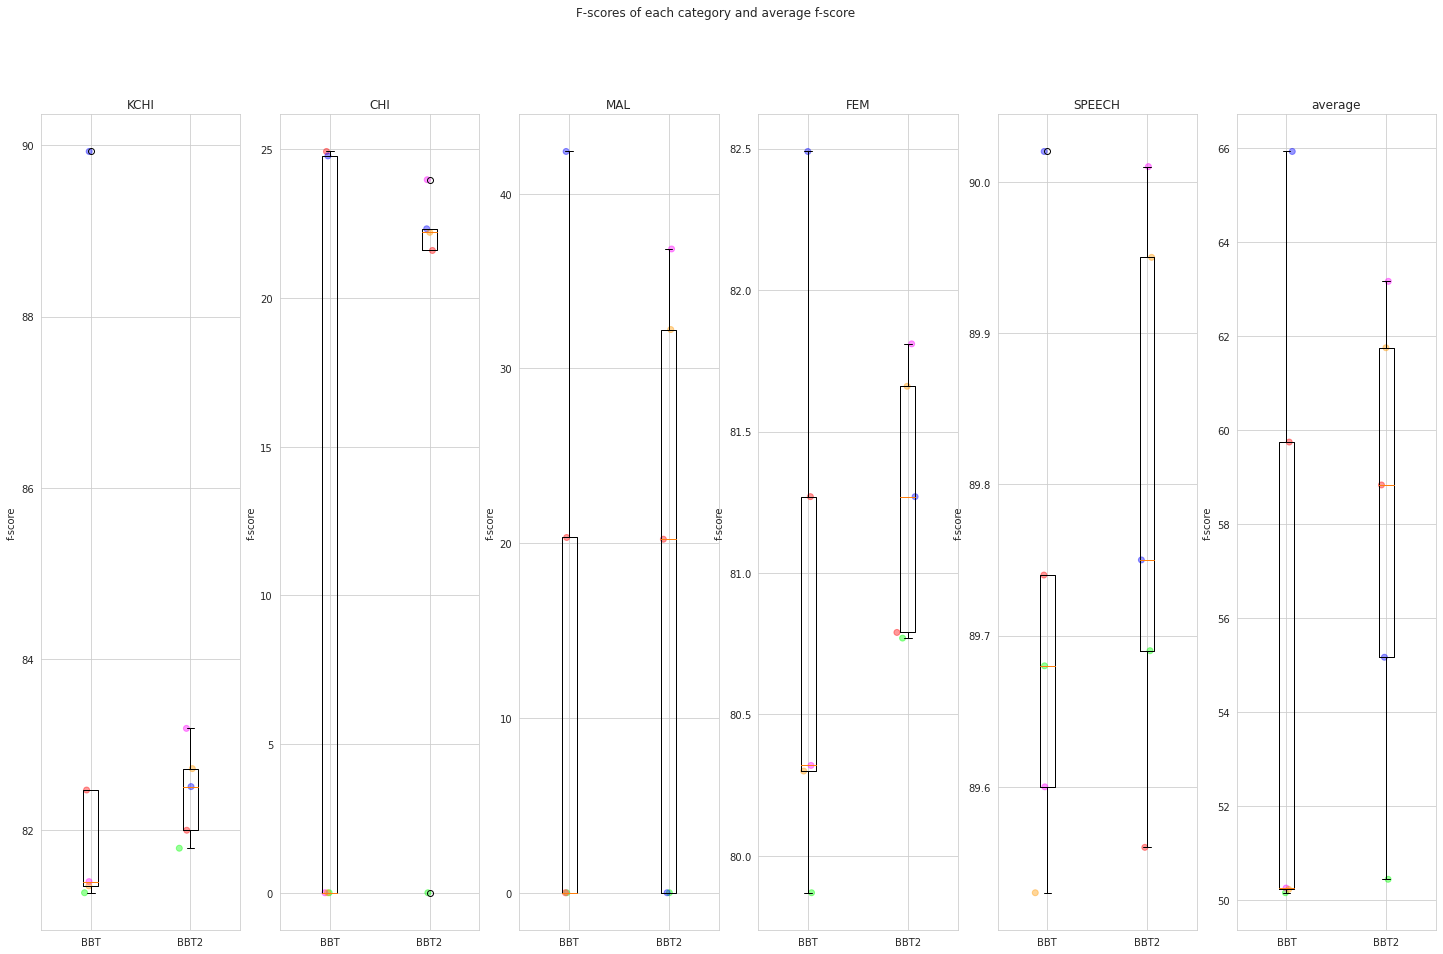

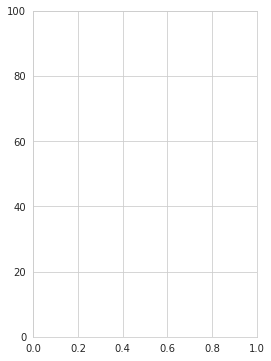

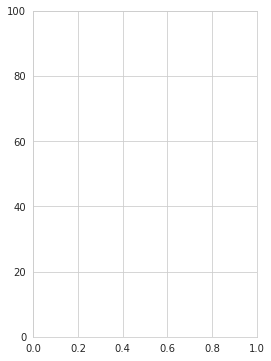

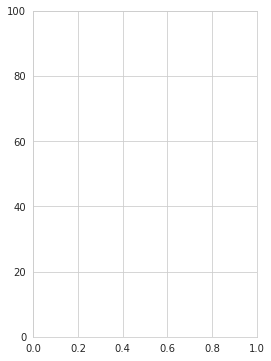

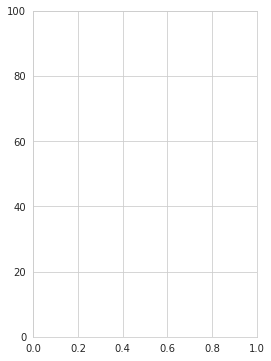

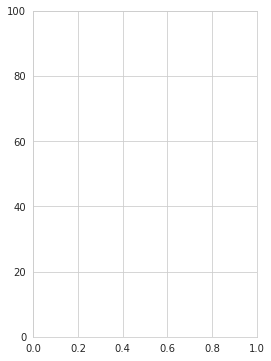

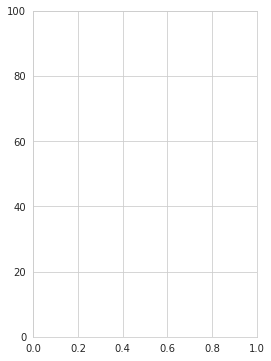

In [34]:
fig, axs = plt.subplots(1, 6, figsize=(25,15))#, sharey=True) # sharey=True
fig.suptitle('F-scores of each category and average f-score')

sub_scattered_boxplot("KCHI", axs, 0,0)
axs[0].set_title('KCHI')
sub_scattered_boxplot("CHI", axs,0,1)
axs[1].set_title('CHI')
sub_scattered_boxplot("MAL", axs,0,2)
axs[2].set_title('MAL')
sub_scattered_boxplot("FEM", axs,0, 3)
axs[3].set_title('FEM')
sub_scattered_boxplot("SPEECH", axs,0,4)
axs[4].set_title('SPEECH')
sub_scattered_boxplot("average", axs,0,5)
axs[5].set_title('average')

for ax in axs.flat:
    ax.set(ylabel='f-score')

# Hide y labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
    
#fig.savefig("final.png", transparent=False)
